#### K-Nearest Neighbors (KNN)
[K-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (KNN) is a non-parametric classification method. It can be used for classification or regression problems.    

In KNN, the distance between the test data and the training points is used to predict the correct class. Select the K number of points that are closest to the test data, and the KNN algorithm will calculate the probability that the training data belongs to the K number of classes and the class with the greatest probability will be selected. As for the regression problem, regression values are determined by the mean of the K selected training points.  

The output depends on whether k-NN is used for classification or regression:
* In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
* In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.  

k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically. The smaller the K, the more complex of the model. 

Pros of KNN:
* A simple algorithm that is easy to understand.
* Used for nonlinear data. 
* The versatile algorithm used for both classification as well as regression.
* Gives high accuracy but there are more good algorithms in supervised models.
* The algorithm doesn't demand to build a model, tune several model parameters, or make additional assumptions.

Cons of KNN:
* The requirement of high storage.
* Prediction rate slow.
* Stores all the training data.
* The algorithm get slower when the number of examples, predictors or independent variables increases.

![Image of knn1](https://miro.medium.com/max/600/0*OltO4Txr-D0lPWNL.png)

---------------------

### In Class Example
---------------------

In class we implement the *KNN* for three species
classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Our task is to classify three iris species using two feature measures, such as sepal length and sepal width. In order to do this we will need the following libraries:

* [matplotlib](https://matplotlib.org/)
* [pandas](https://pandas.pydata.org/)
* [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
* [numpy](https://numpy.org/)

Load libraries and data

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Import the data
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)
iris['data'].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Visualization of data

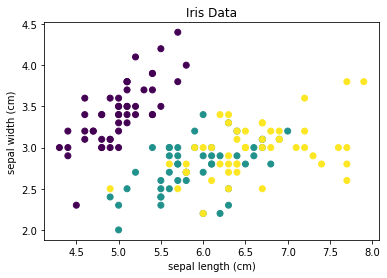

In [31]:
plt.scatter(iris['data']['sepal length (cm)'],
            iris['data']['sepal width (cm)'], 
            c = iris['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris Data')
plt.show()

We want to see how different features' relationship and we want to get different feature combinations

In [32]:
from itertools import combinations
L = list(x for x in combinations(iris['data'].columns, 2))
L

[('sepal length (cm)', 'sepal width (cm)'),
 ('sepal length (cm)', 'petal length (cm)'),
 ('sepal length (cm)', 'petal width (cm)'),
 ('sepal width (cm)', 'petal length (cm)'),
 ('sepal width (cm)', 'petal width (cm)'),
 ('petal length (cm)', 'petal width (cm)')]

Plot and see features' relationships

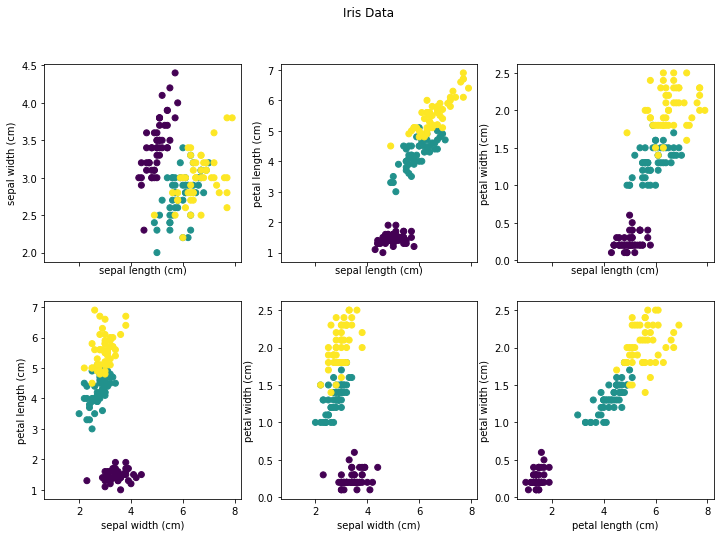

In [33]:
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 3, 
                       sharex = True, 
                       figsize = (12, 8))

for p, q in zip(L, [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]):
    ax[q[0], q[1]].scatter(iris['data'][p[0]],
                           iris['data'][p[1]],
                           c = iris['target'])
    ax[q[0], q[1]].set_xlabel(p[0])
    ax[q[0], q[1]].set_ylabel(p[1])

fig.suptitle('Iris Data')
plt.show()

Set petal length (cm) abd petal width (cm) as X matrix and target as y vector

In [34]:
X = iris['data'][['petal length (cm)',
                  'petal width (cm)' ]].to_numpy()
y = iris['target'].to_numpy()

Next, we split the data into training and testing sets

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

Create a function for euclidean distance

In [36]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

test if it works

In [37]:
distance(X[10], X[67])

2.720294101747088

Define a KNN algorithem

In [38]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    neighbors = []
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

test and see the classification when k=5

In [39]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([6. , 2.5]), 2, 0.09999999999999964],
 [array([6.1, 2.3]), 2, 0.20000000000000018],
 [array([5.7, 2.5]), 2, 0.39999999999999947],
 [array([5.7, 2.3]), 2, 0.44721359549995754],
 [array([5.9, 2.1]), 2, 0.44721359549995754]]

Write KNN predict function fot test data

In [40]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

Function for classification error. Calculate how many points are missed classified and divided by K

In [41]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k)
    return error/k

In [42]:
classification_error(X_test, y_test, X_train, y_train, 9)

0.1111111111111111

Set up a range for K from 3 to 26

In [43]:
possible_k = [x for x in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

Plot the classification error by different K. Choose K = 9

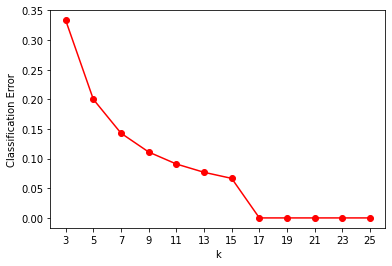

In [44]:
plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.xticks(possible_k)
plt.show()

Plot prediction vs true. We can see some points are missed classified.

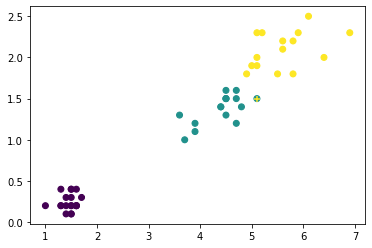

In [45]:
predicted_labels = [KNN_Predict(point, 
                                X_train, 
                                y_train, 
                                9) for point in X_test]

plt.scatter(X_test[:, 0], X_test[:, 1], c = predicted_labels)

plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, marker = '+')

Next we use [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) ftrom sklearn.neighbors to perform the KNN.  
We fit the training data first with K = 3 

In [46]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

compare prediction and true

In [47]:
neigh.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [48]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

We now use petal length (cm) and petal width (cm) as our X and sepal length (cm) as our y

In [49]:
X = iris['data'][['petal length (cm)',
                  'petal width (cm)' ]].to_numpy()
y = iris['data']['sepal length (cm)'].to_numpy()

Split the data into train and test

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

Make prediction by test data

In [51]:
predicted_labels = [KNN_Predict(point, 
                                X_train, 
                                y_train, 
                                3,
                                regression = True)
                    for point in X_test]

Calculate the distance between true y and prediction

In [52]:
np.sqrt((y_test - predicted_labels) @ (y_test - predicted_labels))

2.977321689781683

Plot true y in blue and prediction in orange.

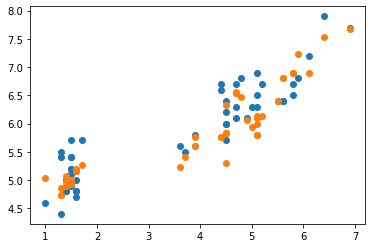

In [53]:
plt.scatter(X_test[:, 0], y_test)

plt.scatter(X_test[:, 0], predicted_labels)

-------------------------------

### Implementation on Different Dataset
---------------------

#### Dataset Information
We will use [penguins dataset](https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris) in this practice. The dataset contains 342 observations and seven variables.  
The seven columns are:
* species (three penguin species: Chinstrap, Adélie, or Gentoo)
* island
* bill_length_mm
* bill_depth_mm
* flipper_length_mm
* body_mass_g
* sex

-----------------

##### We want to use flipper_length_mm and body_mass_g to classify the penguin species (Chinstrap, Adélie, or Gentoo).

-----------------

The packages we will use in the practice are:
* [matplotlib](https://matplotlib.org/)
* [numpy](https://numpy.org/doc/)
* [pandas](https://pandasguide.readthedocs.io/en/latest/)
* [seaborn](https://seaborn.pydata.org/)
* [sklearn](https://scikit-learn.org/stable/)
* [itertools](https://docs.python.org/3/library/itertools.html)


Import the packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
%matplotlib inline
# Import the data
df = pd.read_csv('penguins.csv')

See what does the dataset look like

In [2]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


Check the dataset info, total 7 columns, and 344 rows, but some columns have missing value.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The summary of the dataset

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


Drop the NaN

In [5]:
df = df.dropna()

Explore the data; it seems that flipper_length_mm and body_mass_g are highly correlated.

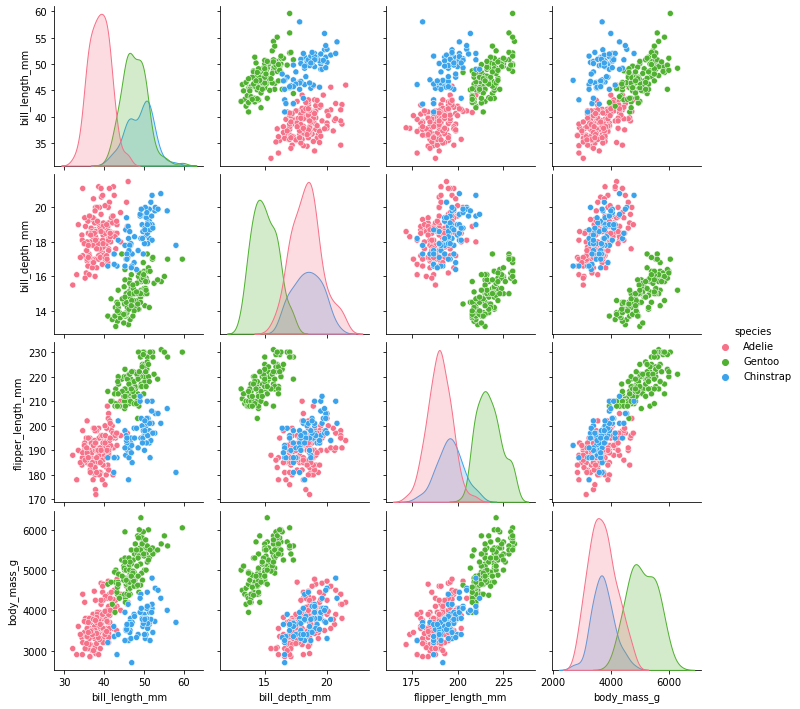

In [6]:
sns.pairplot(df, hue='species',palette='husl')

We make the species into labels by using sklearn.preprocessing LabelEncoder.  
Labels for the species:
* 0:Adelie
* 1:Chinstrap
* 2:Gentoo

In [7]:
from sklearn.preprocessing import LabelEncoder
species_types = (df['species'].unique())
df['species_types'] = df['species']
# creating instance of labelencoder
labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
df['species_types'] = labelencoder.fit_transform(df['species_types'])

In [8]:
df[df['species_types']==2].head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_types
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female,2


In [9]:
df[df['species_types']==1].head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_types
276,Chinstrap,Dream,46.5,17.9,192.0,3500.0,female,1


In [10]:
df[df['species_types']==0].head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_types
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,0


We plot flipper length (mm) vs body mass (g) and flipper length (mm) vs bill length (mm)

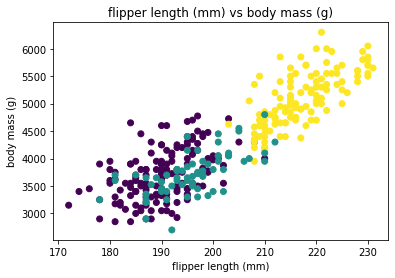

In [11]:
plt.scatter(df['flipper_length_mm'],
            df['body_mass_g'], 
            c = df['species_types'])
plt.xlabel('flipper length (mm)')
plt.ylabel('body mass (g)')
plt.title('flipper length (mm) vs body mass (g)')
plt.show()

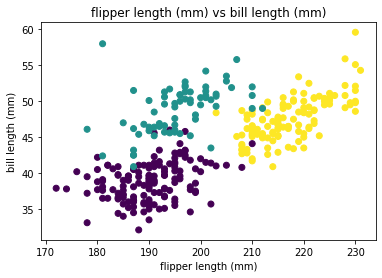

In [12]:
plt.scatter(df['flipper_length_mm'],
            df['bill_length_mm'], 
            c = df['species_types'])
plt.xlabel('flipper length (mm)')
plt.ylabel('bill length (mm)')
plt.title('flipper length (mm) vs bill length (mm)')
plt.show()

Make the feature pairs (bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g) and plot to see their relationships

In [13]:
from itertools import combinations

In [14]:
L = list(x for x in combinations(df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']], 2))

In [15]:
L

[('bill_length_mm', 'bill_depth_mm'),
 ('bill_length_mm', 'flipper_length_mm'),
 ('bill_length_mm', 'body_mass_g'),
 ('bill_depth_mm', 'flipper_length_mm'),
 ('bill_depth_mm', 'body_mass_g'),
 ('flipper_length_mm', 'body_mass_g')]

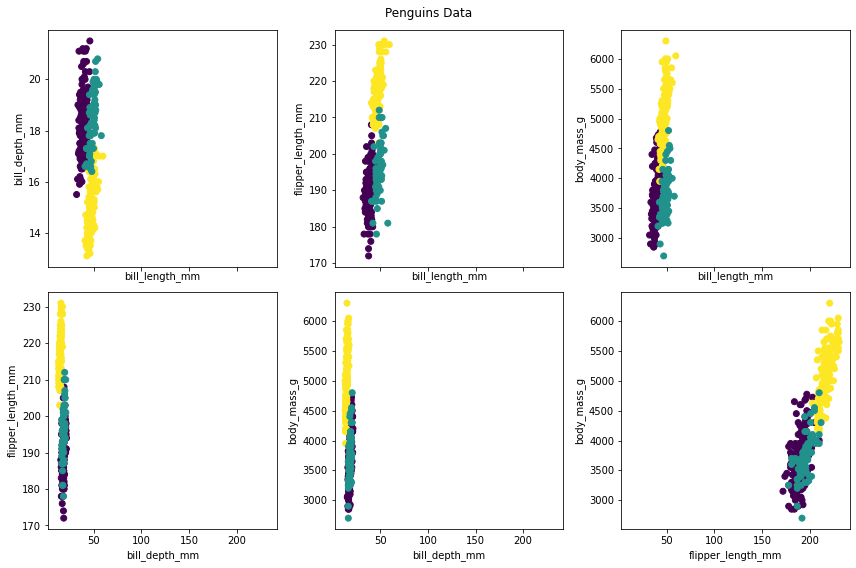

In [16]:
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 3, 
                       sharex = True, 
                       figsize = (12, 8))

for p, q in zip(L, [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]):
    ax[q[0], q[1]].scatter(df[p[0]],
                           df[p[1]],
                           c = df['species_types'])
    ax[q[0], q[1]].set_xlabel(p[0])
    ax[q[0], q[1]].set_ylabel(p[1])

fig.suptitle('Penguins Data')
fig.tight_layout()
plt.show()

Create a X matrix by flipper_length_mm and bill_length_mm, and y by species_types

In [17]:
X = df[['flipper_length_mm','bill_length_mm']].to_numpy()

y = df['species_types'].to_numpy()

Split the data by sklearn.model_selection and train_test_split, with 67% of training data and 33% of test data.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

Create a function for euclidean distance

In [20]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

In [21]:
distance(X[10], X[67])

15.120846537148637

Write a function for KNN traininf algorithm

In [22]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    neighbors = []
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [23]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([220. ,  45.5]), 2, 1.562049935181333],
 [array([219. ,  48.5]), 2, 1.7999999999999972],
 [array([220.,  45.]), 2, 1.9723082923316044],
 [array([217. ,  46.5]), 2, 2.0099751242241783],
 [array([221. ,  46.4]), 2, 2.0223748416156693]]

In [24]:
y_test[-1]

2

Write KNN predict function fot test data

In [25]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

Function for classification error. Calculate how many points are missed classified and divided by K

In [26]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k)
    return error/k

In [27]:
classification_error(X_test, y_test, X_train, y_train, 9)

0.4444444444444444

Set up a range for K from 3 to 26 

In [28]:
possible_k = [x for x in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]


##### Elbow Method
In the context of KNN, the elbow method is used to determine the number of K to use based on plotting classification error as a function of the number of K. It involves picking the elbow of the curve as the number of clusters to use. Picking the "elbow" or "knee" of a curve as a cutoff point is a common method of choosing the point at which diminishing returns no longer justify additional investment. This means selecting a K so that adding another K does not result in a significant improvement in modeling.  

------------------

Plot the classification error by different K. Choose K = 9 

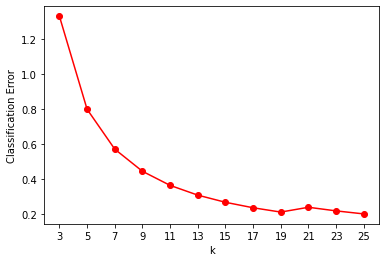

In [29]:
plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.xticks(possible_k)
plt.show()

In [30]:
predicted_labels = [KNN_Predict(point, 
                                X_train, 
                                y_train, 
                                9) for point in X_test]

Plot prediction vs true. We can see some points are missed classified.

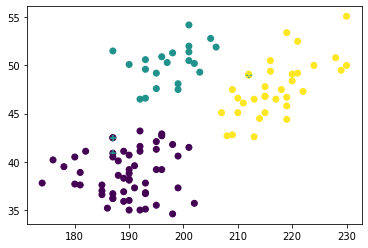

In [31]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = predicted_labels)

plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, marker = '+')

Next we use [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) ftrom sklearn.neighbors to perform the KNN.  
We fit the training data first with K = 3 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Make prediction by test data

In [33]:
neigh.predict(X_test)

array([0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0,
       1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2])

In [34]:
y_test

array([0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0,
       1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1,
       0, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2])

We now use flipper_length_mm and bill_length_mm as our X and body_mass_g as our y

In [35]:
X = df[['flipper_length_mm','bill_length_mm']].to_numpy()

y = df['body_mass_g'].to_numpy()

Split the data into train and test

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

Make prediction by test data

In [37]:
predicted_labels = [KNN_Predict(point, 
                                X_train, 
                                y_train, 
                                3,
                                regression = True)
                    for point in X_test]

Calculate the distance between true y and prediction

In [38]:
np.sqrt((y_test - predicted_labels) @ (y_test - predicted_labels))

3986.9491956744178

Plot true y in blue and prediction in orange.

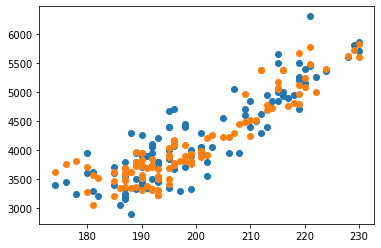

In [39]:
plt.scatter(X_test[:, 0], y_test)

plt.scatter(X_test[:, 0], predicted_labels)

#### References
datasciencelab, W. by, &amp; by, W. (2014, January 10). Machine learning classics: The Perceptron. The Data Science Lab. Retrieved November 10, 2021, from https://datasciencelab.wordpress.com/2014/01/10/machine-learning-classics-the-perceptron/. 